In [1]:
import pandas as pd
import numpy as np
from sklearn.feature_extraction.text import CountVectorizer
from sklearn.model_selection import train_test_split
from sklearn.tree import DecisionTreeClassifier
import re
import nltk
from nltk.util import pr
import matplotlib.pyplot as plt
from matplotlib import style
style.use('ggplot')
from nltk.tokenize import word_tokenize
from nltk.stem import WordNetLemmatizer
from nltk.corpus import stopwords
import string
stopword=set(stopwords.words("english"))
from wordcloud import WordCloud
from sklearn.linear_model import LogisticRegression
from sklearn.metrics import accuracy_score, classification_report, confusion_matrix, ConfusionMatrixDisplay

In [2]:
df = pd.read_csv("twitter_data.csv")
print(df.head())

   Unnamed: 0  count  hate_speech  offensive_language  neither  class  \
0           0      3            0                   0        3      2   
1           1      3            0                   3        0      1   
2           2      3            0                   3        0      1   
3           3      3            0                   2        1      1   
4           4      6            0                   6        0      1   

                                               tweet  
0  !!! RT @mayasolovely: As a woman you shouldn't...  
1  !!!!! RT @mleew17: boy dats cold...tyga dwn ba...  
2  !!!!!!! RT @UrKindOfBrand Dawg!!!! RT @80sbaby...  
3  !!!!!!!!! RT @C_G_Anderson: @viva_based she lo...  
4  !!!!!!!!!!!!! RT @ShenikaRoberts: The shit you...  


In [3]:
df['labels']=df['class'].map({0:"Hate Speech Detected",1:"offensive Language Detected",2:"No hate and offensive speech"})
print(df.head())

   Unnamed: 0  count  hate_speech  offensive_language  neither  class  \
0           0      3            0                   0        3      2   
1           1      3            0                   3        0      1   
2           2      3            0                   3        0      1   
3           3      3            0                   2        1      1   
4           4      6            0                   6        0      1   

                                               tweet  \
0  !!! RT @mayasolovely: As a woman you shouldn't...   
1  !!!!! RT @mleew17: boy dats cold...tyga dwn ba...   
2  !!!!!!! RT @UrKindOfBrand Dawg!!!! RT @80sbaby...   
3  !!!!!!!!! RT @C_G_Anderson: @viva_based she lo...   
4  !!!!!!!!!!!!! RT @ShenikaRoberts: The shit you...   

                         labels  
0  No hate and offensive speech  
1   offensive Language Detected  
2   offensive Language Detected  
3   offensive Language Detected  
4   offensive Language Detected  


In [4]:
df=df[['tweet','labels']]
df.head()

,tweet,labels
0,!!! RT @mayasolovely: As a woman you shouldn't...,No hate and offensive speech
1,!!!!! RT @mleew17: boy dats cold...tyga dwn ba...,offensive Language Detected
2,!!!!!!! RT @UrKindOfBrand Dawg!!!! RT @80sbaby...,offensive Language Detected
3,!!!!!!!!! RT @C_G_Anderson: @viva_based she lo...,offensive Language Detected
4,!!!!!!!!!!!!! RT @ShenikaRoberts: The shit you...,offensive Language Detected


In [5]:
# printing random tweets 
print(df['tweet'].iloc[0],"\n")
print(df['tweet'].iloc[1],"\n")
print(df['tweet'].iloc[2],"\n")
print(df['tweet'].iloc[3],"\n")
print(df['tweet'].iloc[4],"\n")

!!! RT @mayasolovely: As a woman you shouldn't complain about cleaning up your house. &amp; as a man you should always take the trash out... 

!!!!! RT @mleew17: boy dats cold...tyga dwn bad for cuffin dat hoe in the 1st place!! 

!!!!!!! RT @UrKindOfBrand Dawg!!!! RT @80sbaby4life: You ever fuck a bitch and she start to cry? You be confused as shit 

!!!!!!!!! RT @C_G_Anderson: @viva_based she look like a tranny 

!!!!!!!!!!!!! RT @ShenikaRoberts: The shit you hear about me might be true or it might be faker than the bitch who told it to ya &#57361; 



In [6]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 24783 entries, 0 to 24782
Data columns (total 2 columns):
 #   Column  Non-Null Count  Dtype 
---  ------  --------------  ----- 
 0   tweet   24783 non-null  object
 1   labels  24783 non-null  object
dtypes: object(2)
memory usage: 387.4+ KB


In [7]:
#creating a function to process the data
def data_processing(tweet):
    tweet = tweet.lower()
    tweet = re.sub(r"https\S+|www\S+http\S+", '', tweet, flags = re.MULTILINE)
    tweet = re.sub(r'\@w+|\#','', tweet)
    tweet = re.sub(r'[^\w\s]','',tweet)
    tweet = re.sub(r'ð','',tweet)
    tweet_tokens = word_tokenize(tweet)
    filtered_tweets = [w for w in tweet_tokens if not w in stopword]
    return " ".join(filtered_tweets)

In [8]:
df.tweet = df['tweet'].apply(data_processing)

In [9]:
df = df.drop_duplicates('tweet')

In [10]:
#convert it into base form
lemmatizer = WordNetLemmatizer()
def lemmatizing(data):
    tweet = [lemmatizer.lemmatize(word) for word in data]
    return data

In [11]:
df['tweet'] = df['tweet'].apply(lambda x: lemmatizing(x))

In [12]:
# printing the data to see the effect of preprocessing
print(df['tweet'].iloc[0],"\n")
print(df['tweet'].iloc[1],"\n")
print(df['tweet'].iloc[2],"\n")
print(df['tweet'].iloc[3],"\n")
print(df['tweet'].iloc[4],"\n")

rt mayasolovely woman shouldnt complain cleaning house amp man always take trash 

rt mleew17 boy dats coldtyga dwn bad cuffin dat hoe 1st place 

rt urkindofbrand dawg rt 80sbaby4life ever fuck bitch start cry confused shit 

rt c_g_anderson viva_based look like tranny 

rt shenikaroberts shit hear might true might faker bitch told ya 57361 



In [13]:
df.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 24698 entries, 0 to 24782
Data columns (total 2 columns):
 #   Column  Non-Null Count  Dtype 
---  ------  --------------  ----- 
 0   tweet   24698 non-null  object
 1   labels  24698 non-null  object
dtypes: object(2)
memory usage: 578.9+ KB


In [14]:
print(df.head())

                                               tweet  \
0  rt mayasolovely woman shouldnt complain cleani...   
1  rt mleew17 boy dats coldtyga dwn bad cuffin da...   
2  rt urkindofbrand dawg rt 80sbaby4life ever fuc...   
3        rt c_g_anderson viva_based look like tranny   
4  rt shenikaroberts shit hear might true might f...   

                         labels  
0  No hate and offensive speech  
1   offensive Language Detected  
2   offensive Language Detected  
3   offensive Language Detected  
4   offensive Language Detected  


In [15]:
df['labels'].value_counts()

offensive Language Detected     19111
No hate and offensive speech     4160
Hate Speech Detected             1427
Name: labels, dtype: int64

Text(0.5, 1.0, 'Distribution of sentiments')

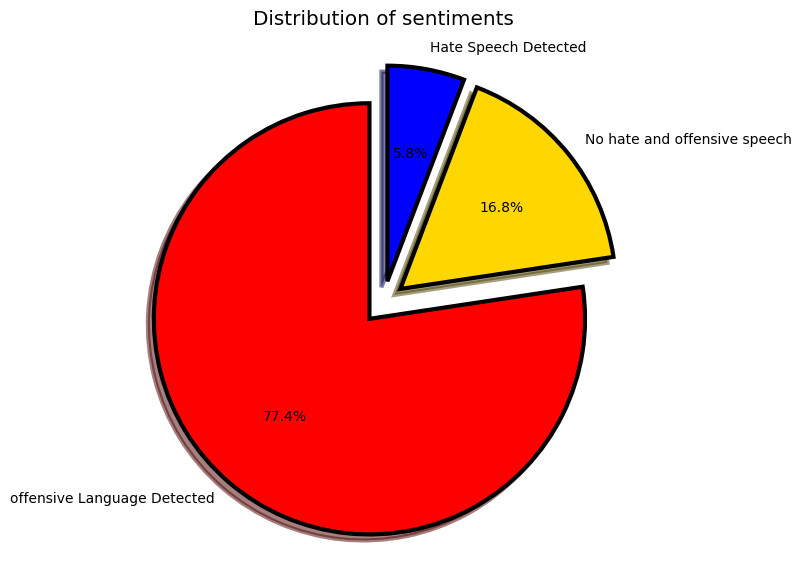

In [16]:
fig = plt.figure(figsize=(7,7))
colors = ("red", "gold","blue")
wp = {'linewidth':3 ,'edgecolor':"black"}
tags = df['labels'].value_counts()
explode = (0.1, 0.1,0.1)
tags.plot(kind='pie',autopct = '%1.1f%%', shadow=True, colors = colors, startangle =90, 
         wedgeprops = wp, explode = explode, label='')
plt.title('Distribution of sentiments')

In [17]:
 Hate_Speech_Detected= df[df.labels == "Hate Speech Detected"]
Hate_Speech_Detected.head()

,tweet,labels
85,blackman38tide halelookyhere howdydowdy11 quee...,Hate Speech Detected
89,cb_baby24 hite_thunduh alsarabsss hes beaner s...,Hate Speech Detected
110,devilgrimz vigxrarts youre fucking gay blackli...,Hate Speech Detected
184,markroundtreejr lmfaoooo hate black people the...,Hate Speech Detected
202,nochillpaz least im nigger httptcorgja7cfoit l...,Hate Speech Detected


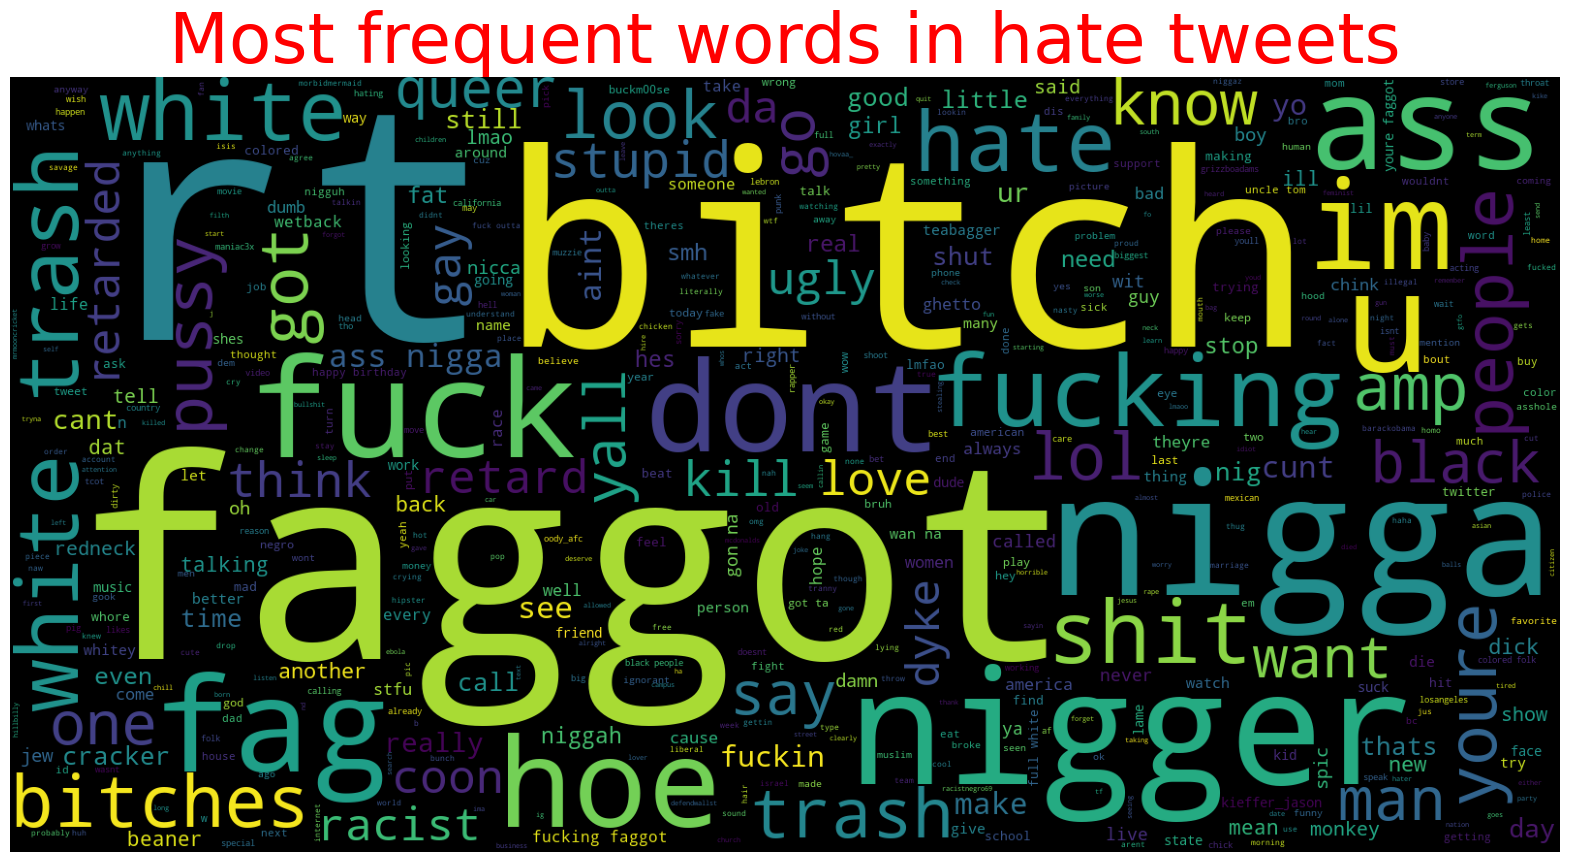

In [18]:
text = ' '.join([word for word in Hate_Speech_Detected['tweet']])
plt.figure(figsize=(20,15), facecolor='None')
wordcloud = WordCloud(max_words=500, width=1600, height=800).generate(text)
plt.imshow(wordcloud)
plt.axis('off')
plt.title('Most frequent words in hate tweets', fontsize = 50,color="red")
plt.show()

In [19]:
offensive_Language_Detected= df[df.labels == "offensive Language Detected"]
offensive_Language_Detected.head()

,tweet,labels
1,rt mleew17 boy dats coldtyga dwn bad cuffin da...,offensive Language Detected
2,rt urkindofbrand dawg rt 80sbaby4life ever fuc...,offensive Language Detected
3,rt c_g_anderson viva_based look like tranny,offensive Language Detected
4,rt shenikaroberts shit hear might true might f...,offensive Language Detected
5,t_madison_x shit blows meclaim faithful somebo...,offensive Language Detected


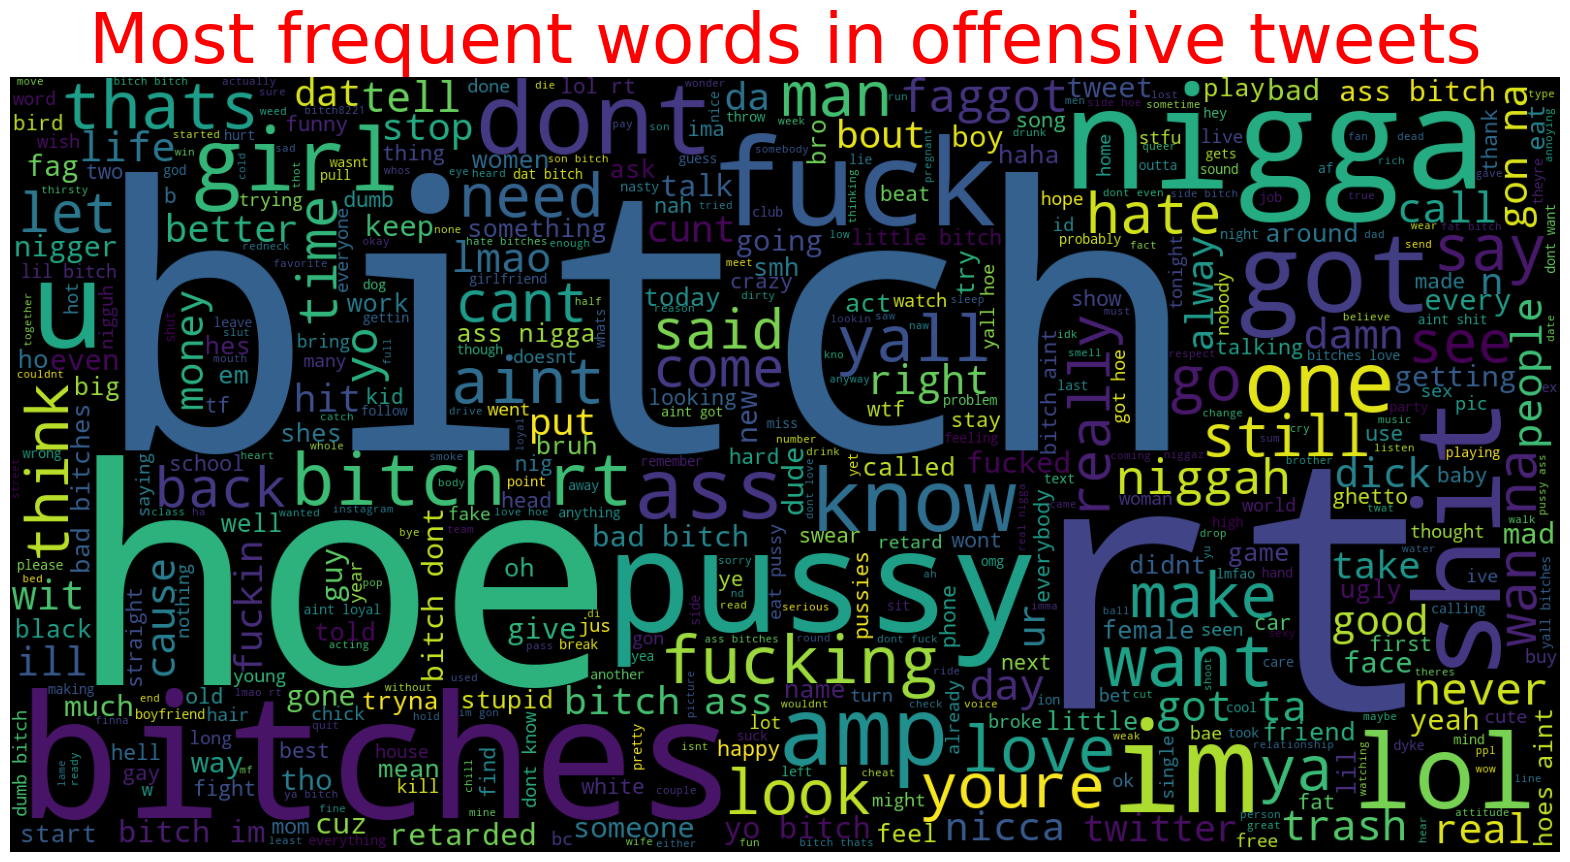

In [20]:
text = ' '.join([word for word in offensive_Language_Detected['tweet']])
plt.figure(figsize=(20,15), facecolor='None')
wordcloud = WordCloud(max_words=500, width=1600, height=800).generate(text)
plt.imshow(wordcloud)
plt.axis('off')
plt.title('Most frequent words in offensive tweets', fontsize = 50, color="red")
plt.show()

In [21]:
No_hate= df[df.labels == "No hate and offensive speech"]
No_hate.head()

,tweet,labels
0,rt mayasolovely woman shouldnt complain cleani...,No hate and offensive speech
40,momma said pussy cats inside doghouse,No hate and offensive speech
63,addicted2guys simplyaddictedtoguys httptco1jl4...,No hate and offensive speech
66,allaboutmanfeet httptco3gzupfumev woof woof ho...,No hate and offensive speech
67,allyhaaaaa lemmie eat oreo amp dishes one oreo...,No hate and offensive speech


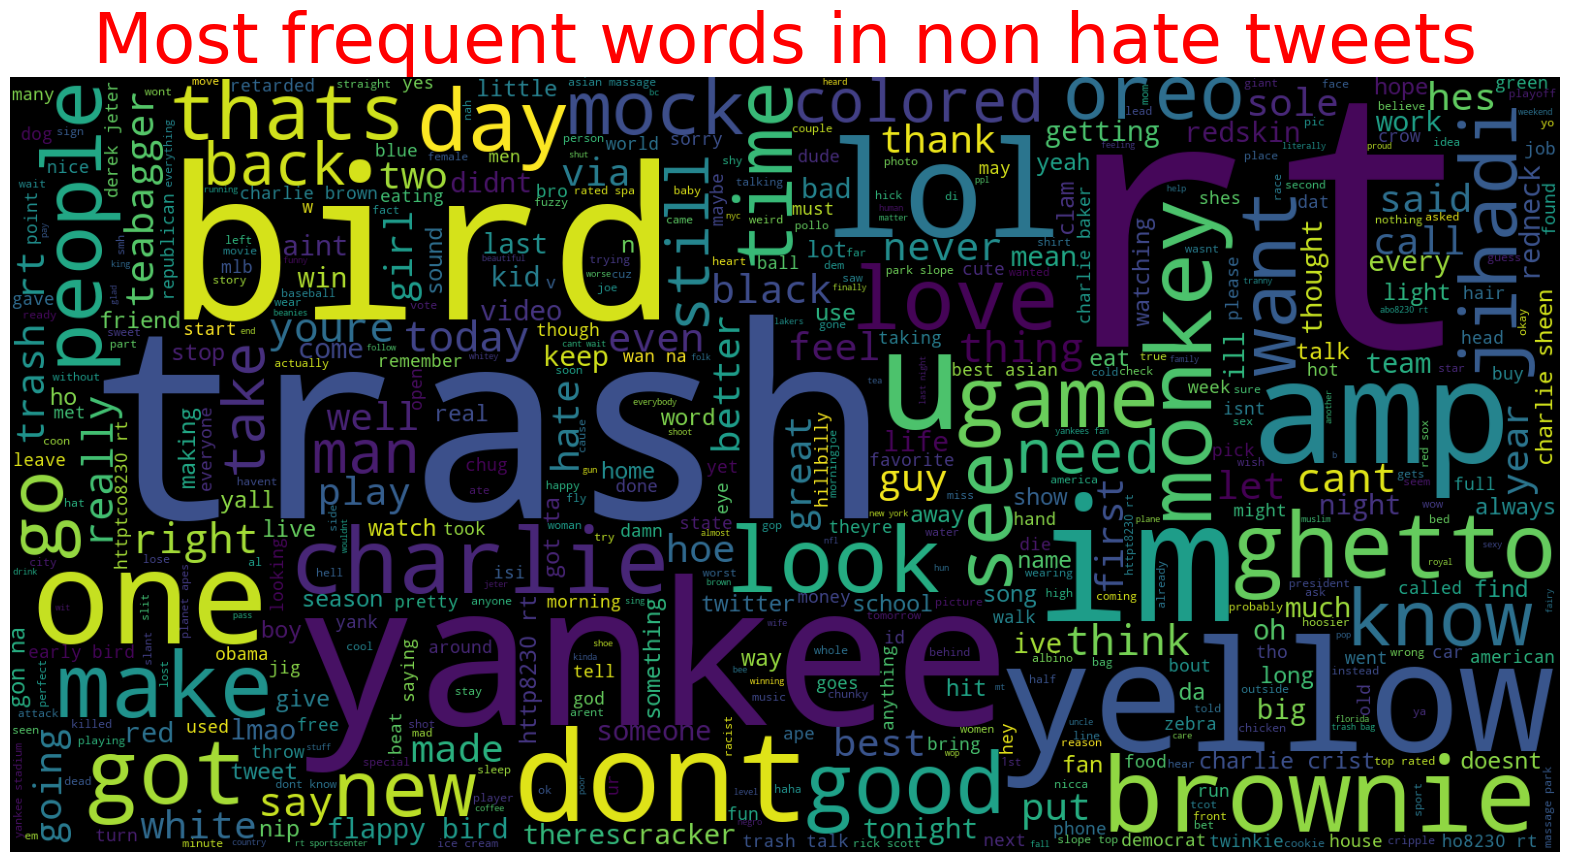

In [22]:
text = ' '.join([word for word in No_hate['tweet']])
plt.figure(figsize=(20,15), facecolor='None')
wordcloud = WordCloud(max_words=500, width=1600, height=800).generate(text)
plt.imshow(wordcloud)
plt.axis('off')
plt.title('Most frequent words in non hate tweets', fontsize = 50,color="red")
plt.show()

In [23]:
x=np.array(df["tweet"])
y=np.array(df["labels"])

cv=CountVectorizer()
x=cv.fit_transform(x)
x_train,x_test,y_train,y_test=train_test_split(x,y,test_size=0.35,random_state=42)
clf=DecisionTreeClassifier()
clf.fit(x_train,y_train)


DecisionTreeClassifier()

In [24]:
accuracy = clf.score(x_test, y_test)
print("Test accuarcy: {:.2f}%".format(accuracy*100))

Test accuarcy: 88.70%


In [25]:
print("Size of x_train:", (x_train.shape))
print("Size of y_train:", (y_train.shape))
print("Size of x_test: ", (x_test.shape))
print("Size of y_test: ", (y_test.shape))

Size of x_train: (16053, 40510)
Size of y_train: (16053,)
Size of x_test:  (8645, 40510)
Size of y_test:  (8645,)


In [26]:
logreg = LogisticRegression(max_iter=500)
logreg.fit(x_train, y_train)
logreg_predict = logreg.predict(x_test)
logreg_acc = accuracy_score(logreg_predict, y_test)
print("Test accuarcy: {:.2f}%".format(logreg_acc*100))

Test accuarcy: 89.82%


In [27]:
print(confusion_matrix(y_test, logreg_predict))
print("\n")
print(classification_report(y_test, logreg_predict))

[[ 108   63  306]
 [  10 1272  191]
 [ 105  205 6385]]


                              precision    recall  f1-score   support

        Hate Speech Detected       0.48      0.23      0.31       477
No hate and offensive speech       0.83      0.86      0.84      1473
 offensive Language Detected       0.93      0.95      0.94      6695

                    accuracy                           0.90      8645
                   macro avg       0.75      0.68      0.70      8645
                weighted avg       0.89      0.90      0.89      8645



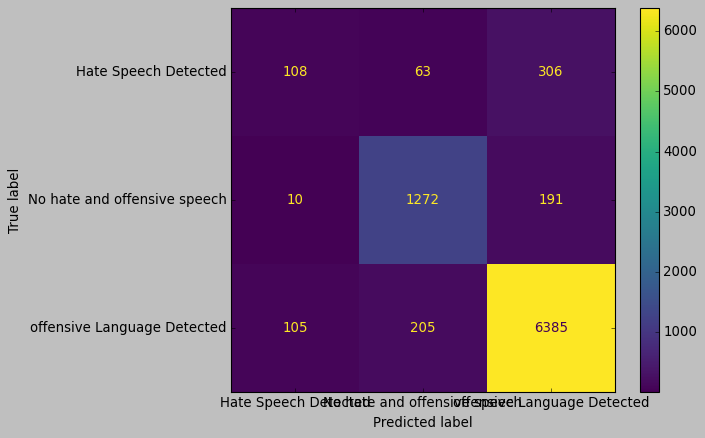

In [28]:
style.use('classic')
cm = confusion_matrix(y_test, logreg_predict, labels=logreg.classes_)
disp = ConfusionMatrixDisplay(confusion_matrix=cm, display_labels=logreg.classes_)
disp.plot()

In [29]:
test_data="I will kill you"
df=cv.transform([test_data]).toarray()
print(clf.predict(df))

['Hate Speech Detected']


In [35]:
test_data="you are a kid"
df=cv.transform([test_data]).toarray()
print(clf.predict(df))

['offensive Language Detected']


In [34]:
test_data="you are ugly"
df=cv.transform([test_data]).toarray()
print(clf.predict(df))

['offensive Language Detected']
